<img src='Cover5-01.png'>

# План семинара

- **Визуализация на примере данных ЭКГ**
- **Другие виды визуализации и их использование**
- **Генерация данных**
- **Домашнее задание**

# Визуализация на примере данных ЭКГ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Загружаем датасеты**

In [2]:
f3=pd.read_csv('3f.txt')
f2=pd.read_csv('2f.txt')
fR=pd.read_csv('Rf.txt')
fS=pd.read_csv('Sf.txt')
fT=pd.read_csv('Tf.txt')

### Описание датасетов

N = 22821

- **f3** Каждая из N строк содержит 216 чисел - число вхождений триграмм (триграммы отсортированы лексикографически).
- **f2** Каждая из N строк содержит 36 чисел - число вхождений биграмм (биграммы отсортированы лексикографически).
- **fR** Каждая из N строк содержит 600 чисел - апмлитуды соответствующих ЭКГ-записей.
- **fT** Каждая из N строк содержит 600 чисел - интервалы соответствующих ЭКГ-записей.
- **fS** Каждая из N строк содержит 599 чисел - кодограммы соответствующих ЭКГ-записей(0=A, 1=B,...5=F, -1=выброс).

**Признаки**

- 'RecCode' --- код ЭКГ записи
- 'ObslCode' --- код обследования

Подряд идущим записям ЭКГ одного и того же человека (или записям с разных отведений) приписывался один и тот же номер обследования. Все строки с одинаковым номером обследования должны целиком быть в обучении или контроле.

Остальные признаки обозначаются F(номер). Их смысл зависит от датасета.


**Классы**

AZ,AP,AR,AKH,AM,TT,BL,CHD,VD,GD,GR,GB,DZH,DG,ZHO,ZHK,KHE,ZHR,ZD,IB,IR,
KS,KYA,KI,LO,MO,MN,MT,MME,MK,MR,PT,PG,PZH,PK,PU,PP,PZ,PS,PR,PB,Cr,
RZH,RI,RD,RL,RU,RM,OMZH,RN,RO,RPZH,RR,RP,RSH,RSHCH,RYA,RV,RZ,SR,SD,SZ,USHCH,
MP,KHB,KHG,NF,KHKH,KHKHE,BK,EKP,ES,EM,ESH,YAZH,YAB,ALG,OGM,GPT,GPZ,PZHS,RVM,
EP,OL,LFG,OPR,OTK,OSHCHZH,OM,A,BR,VDE,GDE,YABE,GBE,IBE,SDE,MKE,ZHKE,USHCHE,
KHGE,DZHE,IM,RES,OK,RDO,RLO,RYAO,RPO,RRO,DES,AR,OP,MTE,ROE,KYAO,MM,YAK,
MGR,MPO,TSP,AD,EAP,EAKH,EA,EAT,EGD,TRS,GBK,TBTS,TB?,TBO,TBA,OPE,OZH,no

**Из них нас интересует:**

In [3]:
classlist=['AZ','VD','GB','ZHK','IB','MK','MME','SD','USHCH',
           'KHGE','KHKHE','EA','EAP','EAKH','YABE']

Сгенерируем список для работы с признаками

In [4]:
listF=[]
for i in range(600):
    newF='F'+str(i+1)
    listF.append(newF)

## Гистограмма

Рассмотрим встречаемость униграмм для различных классов при помощи гистограмм.

(array([   725.,      0.,  16990.,      0.,  26184.,      0.,  32601.,
             0.,  32241.,      0.,  27546.,      0.,  20052.]),
 array([-1.        , -0.53846154, -0.07692308,  0.38461538,  0.84615385,
         1.30769231,  1.76923077,  2.23076923,  2.69230769,  3.15384615,
         3.61538462,  4.07692308,  4.53846154,  5.        ]),
 <a list of 13 Patch objects>)

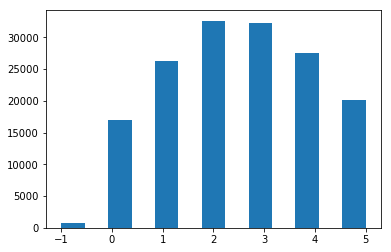

In [5]:
UniList=[]
for i in range(len(fS[fS['AZ']==1][listF[:599]])):
    UniList.extend(fS[fS['AZ']==1][listF[:599]].iloc[i])
hist(UniList, bins=13)

Понятно, но не красиво. Сделаем красиво.

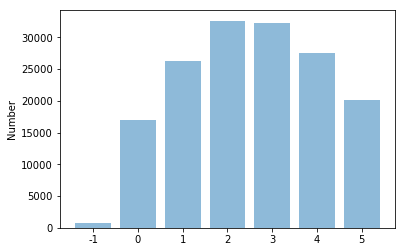

In [6]:
names=[-1,0,1,2,3,4,5]
nums=[UniList.count(-1),UniList.count(0),UniList.count(1),UniList.count(2),
      UniList.count(3),UniList.count(4),UniList.count(5)]
plt.bar(names, nums, align='center', alpha=0.5)
plt.xticks(names, names)
plt.ylabel('Number') 
plt.show()

**Задание**

- Построить гистограммы для других классов и проанализировать результат.
- Построить гистограммы для биграмм и на их основании сделать предположение о информативности признаков для задач двухклассовой классификации.
- (Дополнительное) Проверить предположения о информативности признаков при помощи решения задачи классификации

## Последовательности

Рассмотрим на примере последовательности амплитуд

In [7]:
num_rec=50
seq1=list(fR[fR['AZ']==1][listF].iloc[num_rec])

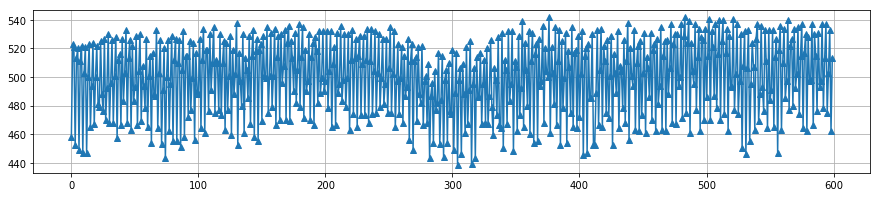

In [8]:
figure(figsize=(15, 3))
plot(seq1, '-^')
grid(True)

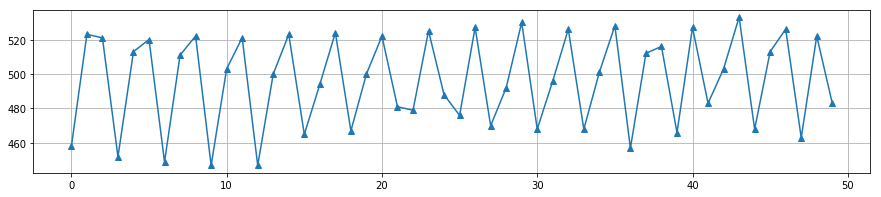

In [9]:
figure(figsize=(15, 3))
plot(seq1[:50], '-^')
grid(True)

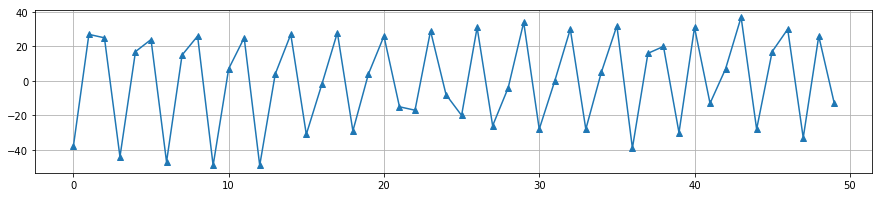

In [10]:
figure(figsize=(15, 3))
plot(seq1[:50]-mean(seq1[:50]), '-^')
grid(True)

<Container object of 3 artists>

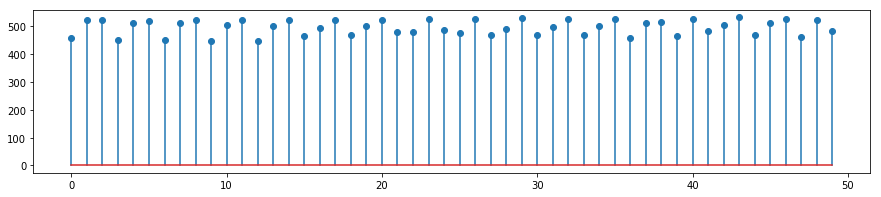

In [11]:
figure(figsize=(15, 3))
stem(seq1[:50])

<Container object of 3 artists>

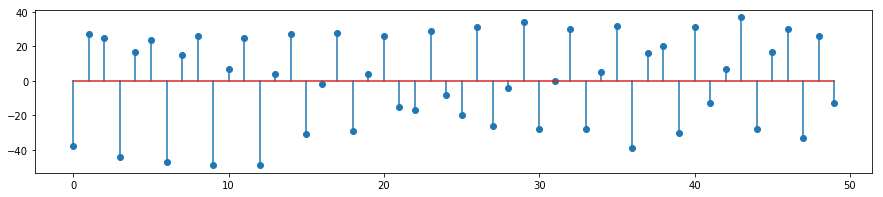

In [12]:
figure(figsize=(15, 3))
stem(seq1[:50]-mean(seq1[:50]))

<Container object of 50 artists>

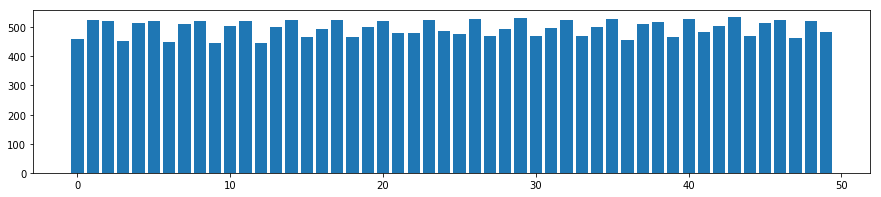

In [13]:
figure(figsize=(15, 3))
bar(np.arange(len(seq1[:50])), seq1[:50])

<Container object of 50 artists>

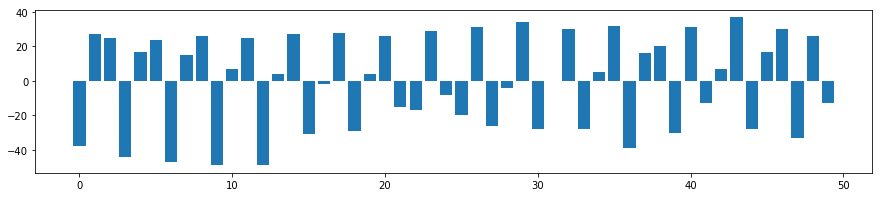

In [14]:
figure(figsize=(15, 3))
bar(np.arange(len(seq1[:50])), seq1[:50]-mean(seq1[:50]))

## Оценка плотности

Рассмотрим на примере последовательности амплитуд.

In [15]:
from scipy.stats import gaussian_kde

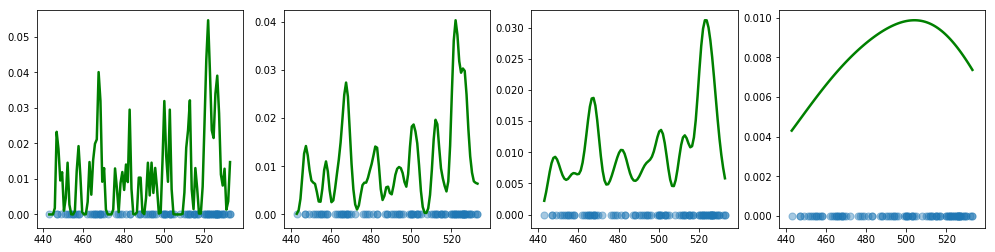

In [16]:
figure(figsize=(17, 4))

xs = np.linspace(min(seq1[:100])-0.01, max(seq1[:100])+0.01, 100)

widths = [0.02, 0.05, 0.1, 1]

for i, width in enumerate(widths):
    subplot(1, 4, i+1)
    density = gaussian_kde(seq1[:50], bw_method=width)
    plot(xs, density(xs), linewidth=2.5, color='green')
    scatter(seq1[:100], np.zeros(len(seq1[:100])), s=50, alpha=0.4)

**Задание**

- Построить данные графики для других классов и проанализировать результат.

# Другие виды визуализации и их использование

Стандартные наборы данных и генераторы в SciKit-Learn

In [20]:
from sklearn import datasets

In [21]:
diabetes = datasets.load_diabetes()
X = diabetes.data

In [22]:
# sample 1-d data
points1 = numpy.random.choice(X[:, 5], 100)

In [23]:
# sample 2-d data
points2x, points2y = X[:,5], X[:,6]

## Одномерные признаки

### Набор точек на прямой

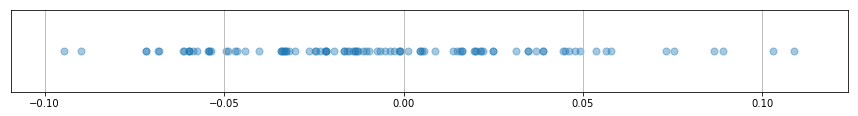

In [24]:
figure(figsize=(15, 1.5)), grid(True, axis='x'), yticks([])
scatter(points1, np.zeros(len(points1)), s=50, alpha=0.4)

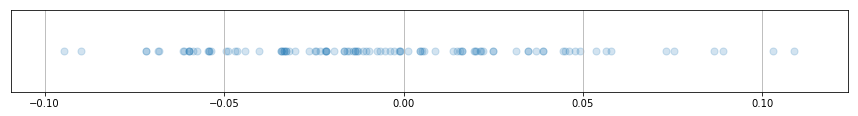

In [25]:
figure(figsize=(15, 1.5)), grid(True, axis='x'), yticks([])
scatter(points1, np.zeros(len(points1)), s=50, alpha=0.2)

### Jitter: случайно выбираем вертикальную координату, чтобы лучше видеть количество точек

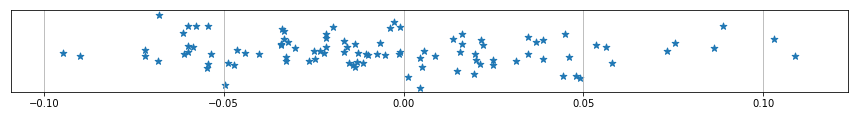

In [26]:
figure(figsize=(15, 1.5)), grid(True, axis='x'), yticks([])
scatter(points1, randn(len(points1)), s=50, marker='*')

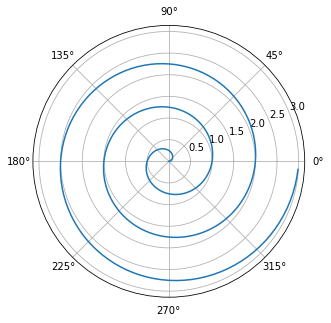

In [27]:
r = np.arange(0, 3.0, 0.01)
theta = 2 * np.pi * r

figure(figsize=(5, 5))
polar(theta, r)

### Многомерные данные

In [28]:
from sklearn import datasets
import seaborn as sns

In [29]:
iris = datasets.load_iris()

iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target

In [30]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Scatter plot

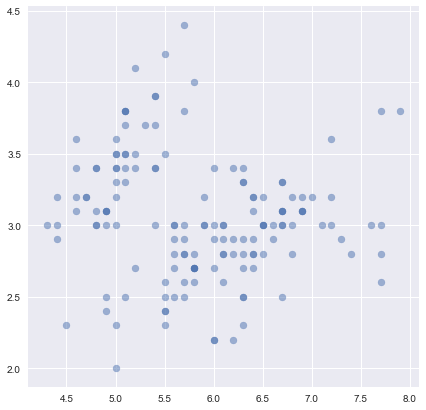

In [31]:
figure(figsize=(7, 7))
scatter(iris_frame.iloc[:, 0], iris_frame.iloc[:, 1], alpha=0.5)
grid(True)

/Users/flaren/anaconda/envs/MyPython3/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


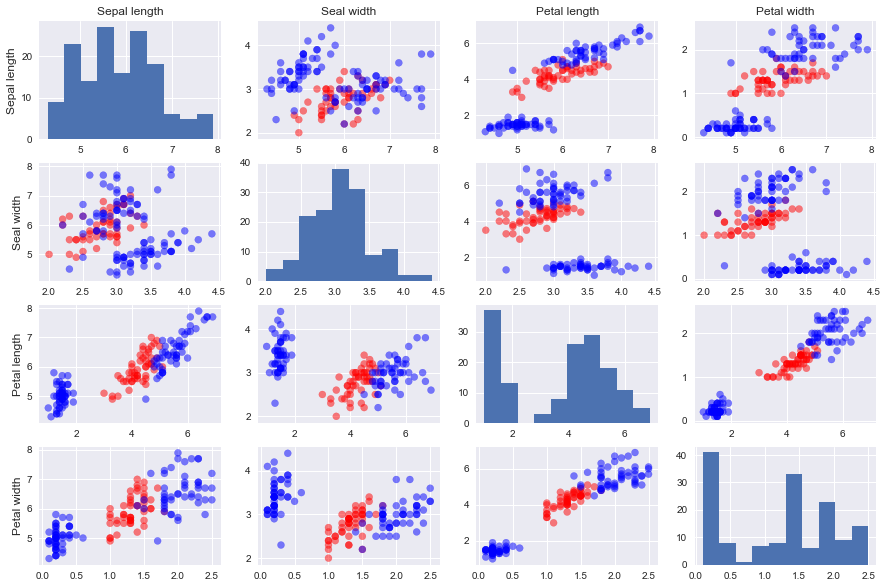

In [32]:
N = len(iris_frame.iloc[:,:4].T)
T=len(iris_frame.iloc[:,:])
color=[]
for t in range(T):
    if iris_frame.ix[t,4]==1.0:
        color+=['blue']
    if iris_frame.ix[t,4]==2.0:
        color+=['red']
    if iris_frame.ix[t,4]==3.0:
        color+=['yellow']
data_name=['Sepal length', 'Seal width', 'Petal length', 'Petal width']
fig = figure(figsize=(15, 10)) 
for i in list(range(N)):
    for j in list(range(N)): 
        ax = fig.add_subplot(N,N,i*N+j+1) 
        if j == 0: 
            ax.set_ylabel(data_name[i],size='12')
        if i == 0: 
            ax.set_title(data_name[j],size='12')
        if i == j: 
            ax.hist(iris_frame.iloc[:,i], 10) 
        else:    
            ax.scatter(iris_frame.iloc[:,i], iris_frame.iloc[:,j] ,c=color[:], alpha=0.5)  

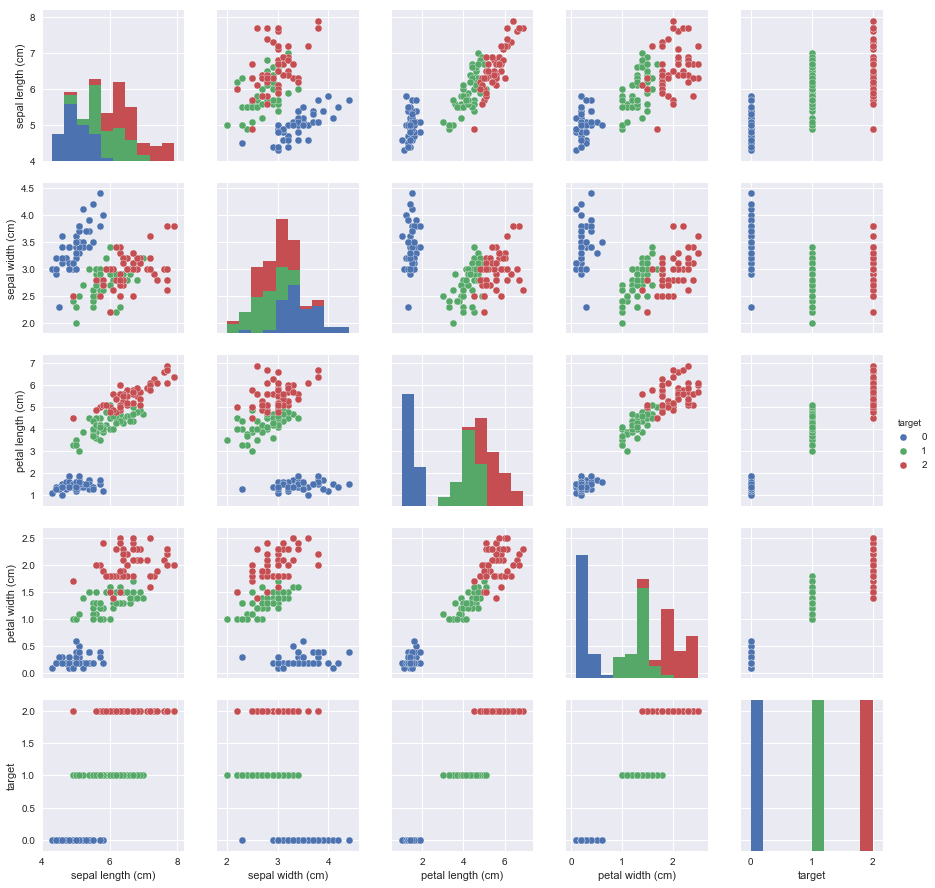

In [33]:
sns.pairplot(iris_frame, hue = 'target')

## Данные какой размерности можно представить одним двумерным скаттер-плотом?

 - координата X
 - координата Y
 - цвет
 - размер
 - форма

In [34]:
diabetes = datasets.load_diabetes()

In [35]:
min(diabetes.data[:, 5]), max(diabetes.data[:, 5])

(-0.11561306597939799, 0.198787989657293)

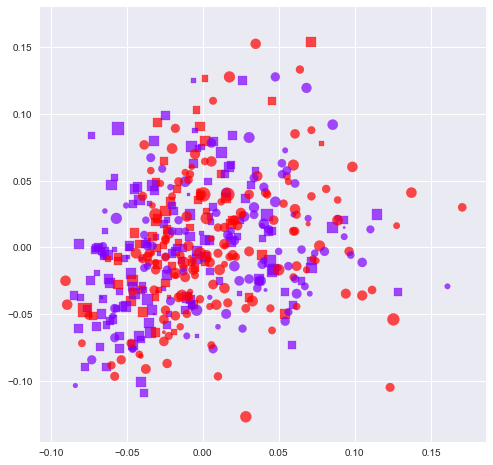

In [36]:
figure(figsize=(8, 8))

feature = diabetes.data[:, 5]
s = 200*((feature - min(feature)) / (max(feature) - min(feature)))

feature2 = (diabetes.data[:, 6] > 0)

scatter(diabetes.data[feature2, 2], 
        diabetes.data[feature2, 4], 
        c=diabetes.data[feature2, 1], 
        s=s, 
        cmap='rainbow', 
        marker='s',
        alpha=0.7)
scatter(diabetes.data[np.logical_not(feature2), 2], 
        diabetes.data[np.logical_not(feature2), 4], 
        c=diabetes.data[np.logical_not(feature2), 1], 
        s=s, 
        cmap='rainbow', 
        marker='o',
        alpha=0.7)

## Дискретные признаки и scatter

In [37]:
f = (diabetes.data[:,3] - min(diabetes.data[:,3]) )*4
feature = np.zeros(len(f))
feature[f > 0.2] = 1
feature[f > 0.4] = 2
feature[f > 0.6] = 3
feature[f > 0.8] = 4

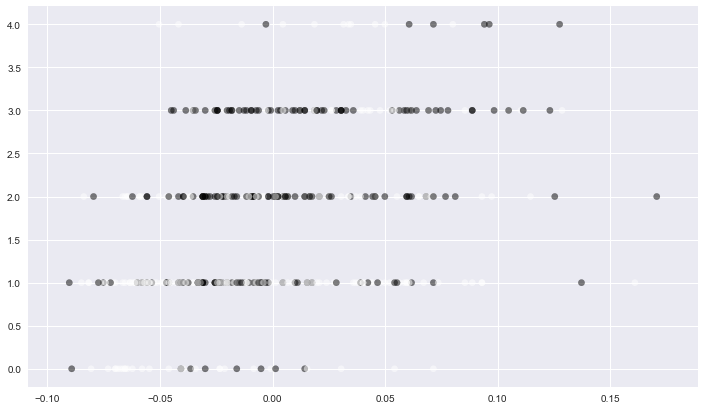

In [38]:
figure(figsize=(12, 7))
scatter(diabetes.data[:,2], feature, alpha=0.5, c=diabetes.data[:, 1], s=40)
grid(True)

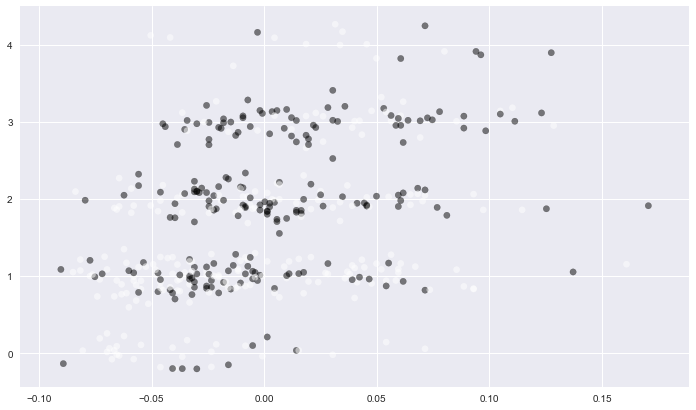

In [39]:
figure(figsize=(12, 7))
scatter(diabetes.data[:,2], feature + 0.15*randn(len(feature)), alpha=0.5, c=diabetes.data[:, 1], s=40)
grid(True)

# Генерация данных

In [40]:
def plot_model_data(blue_data, red_data):
    pylab.figure(figsize=(10, 10))
    pylab.scatter(blue_data[:,0], blue_data[:,1], color="blue", alpha=0.3)
    pylab.scatter(red_data[:,0], red_data[:,1], color="red", alpha=0.3)
    pylab.show()

In [41]:
def generate_linear(point_count, slope, constant):
    points = np.random.rand(point_count, 2)
    above_index = slope * points[:, 0] + constant < points[:, 1]
    blue_data = points[above_index, :]
    red_data = points[~above_index, :]
    return blue_data, red_data

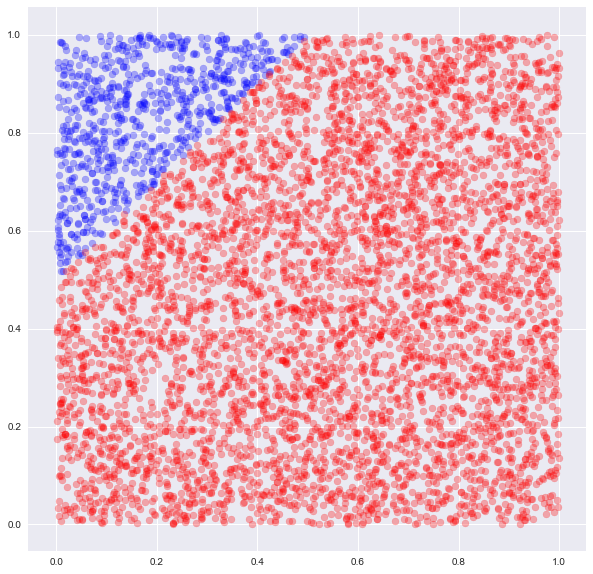

In [42]:
linear1, linerate2 = generate_linear(6000, 1, 0.5)
plot_model_data(linear1, linerate2)

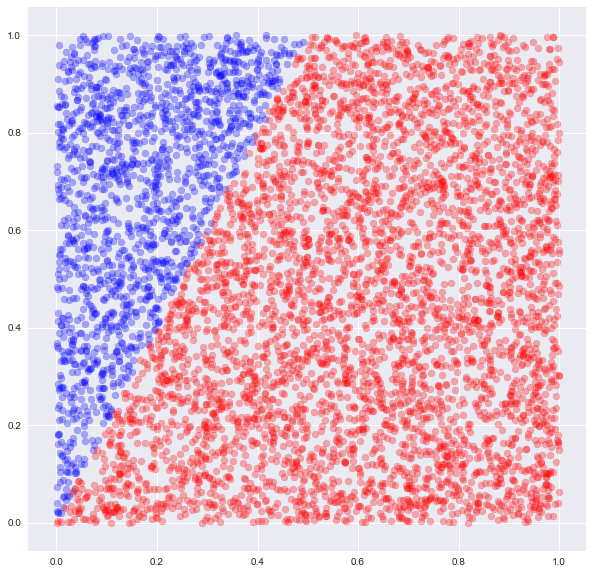

In [43]:
linear1, linerate2 = generate_linear(6000, 2, 0.0)
plot_model_data(linear1, linerate2)

In [46]:
def generate_saw(point_count, width, height):
    points = np.random.rand(point_count, 2)
    subsaw_index = (points[:, 0] / width).astype(int)
    unit = points[:, 0] - subsaw_index * width
    below_index = points[:, 1] < 0.5 - 2.0 * (subsaw_index % 2 - 0.5) * (unit * 2 * height / width - height)
    blue_data = points[below_index, :]
    red_data = points[~below_index, :]
    return blue_data, red_data

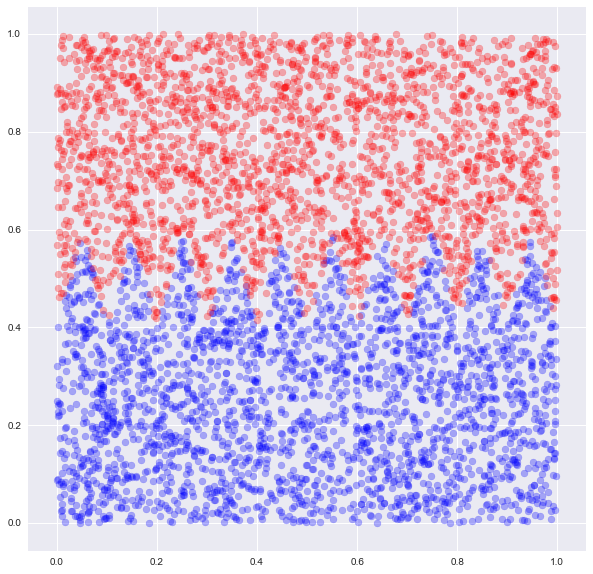

In [47]:
blue_data, red_data = generate_saw(5000, 0.05, 0.1)
plot_model_data(blue_data, red_data)

In [48]:
def generate_gaussian(point_count, mu, transform_matrix):
    """V = transform_matrix
    function: X = mu + V.T x X
    output: Normal(mu, V.T x V)
    """
    points = np.random.randn(point_count, 2)
    points = mu + np.dot(transform_matrix.T, points.T).T
    return points

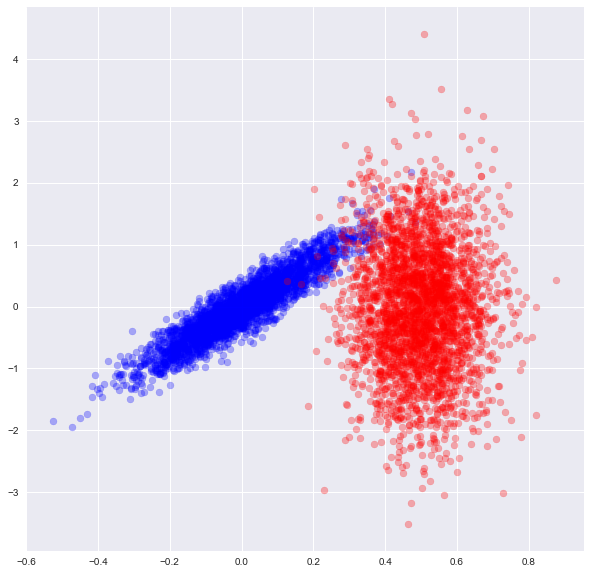

In [49]:
blue_data = generate_gaussian(3000, (0, 0), np.array([[0.1, 0.2], [0.1, 0.5]]))
red_data = generate_gaussian(3000, (0.5, 0), np.array([[0.1, 0], [0, 1.0]]))
plot_model_data(blue_data, red_data)

## Генерация выборок в sklearn

#### datasets.make_circles

In [50]:
circles = datasets.make_circles()

In [51]:
print ("features: {}".format(circles[0][:10]))
print ("target: {}".format(circles[1][:10]))

features: [[ -6.37423990e-01  -7.70513243e-01]
 [ -7.74866529e-01  -1.98951910e-01]
 [  6.27905195e-02  -9.98026728e-01]
 [ -8.00000000e-01  -2.57299624e-16]
 [  5.02324156e-02   7.98421383e-01]
 [  6.27905195e-02   9.98026728e-01]
 [  7.74866529e-01   1.98951910e-01]
 [ -7.43821189e-01   2.94499642e-01]
 [  9.29776486e-01   3.68124553e-01]
 [ -1.49905052e-01   7.85829801e-01]]
target: [0 1 0 1 1 0 1 1 0 1]


In [52]:
# классы точек в датасете
circles[1]

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0])

In [53]:
from matplotlib.colors import ListedColormap

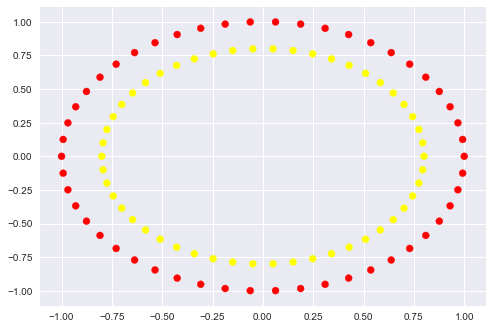

In [54]:
colors = ListedColormap(['red', 'yellow'])

matplotlib.pyplot.scatter(list((x[0] for x in circles[0])), list((x[1] for x in circles[0])), c = circles[1], cmap = colors)

In [55]:
def plot_2d_dataset(data, colors):
    matplotlib.pyplot.scatter(list(x[0] for x in data[0]), list(x[0] for x in data[0]), c = data[1], cmap = colors)

In [56]:
noisy_circles = datasets.make_circles(noise = 0.15)

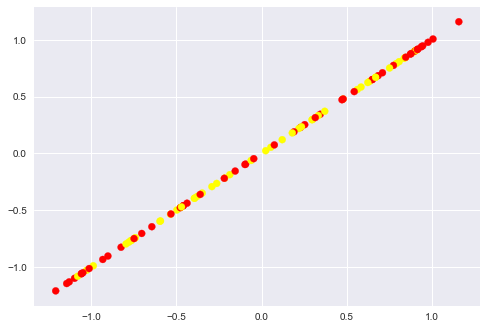

In [57]:
plot_2d_dataset(noisy_circles, colors)

In [58]:
simple_classification_problem = datasets.make_classification(n_features = 2, n_informative = 1, 
                                                            n_redundant = 1, n_clusters_per_class = 1,
                                                            random_state = 1 )

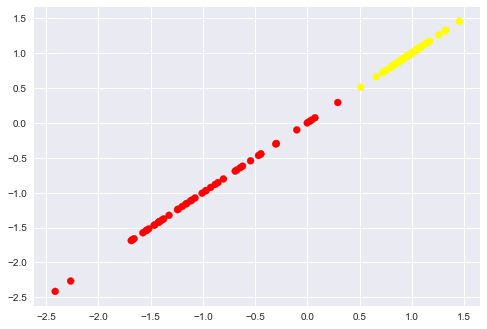

In [59]:
plot_2d_dataset(simple_classification_problem, colors)

In [60]:
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 4, 
                                                      n_redundant = 0, n_clusters_per_class = 1, random_state = 1)

colors = ListedColormap(['red', 'blue', 'green', 'yellow'])

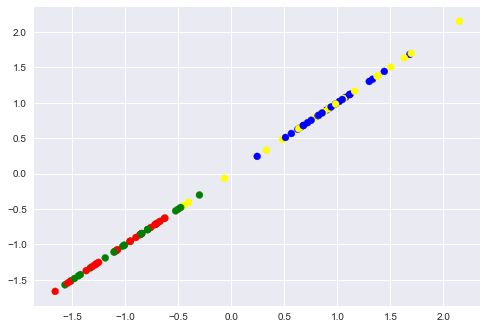

In [61]:
plot_2d_dataset(classification_problem, colors)

# Домашнее задание

- На основе равномерного распределения сгенерировать выборку, представляющую собой синий круг внутри красного квадрата.
- Используя рассмотренные методы визуализации рассмотреть датасет f3 триграмм. Выделить информативные признаки для решения каждой из 14 задач двухклассовой классификации: 'AZ' против каждого из оставшихся классов.
- (Дополнительное) Проверить свою гипотезу, рассмотрев соответствующие задачи классификации